In [28]:
import pandas as pd
import pymongo
from pymongo import MongoClient

df = pd.read_csv('visadata')

## Clean Data

In [29]:
df.head()

,_id,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,663386b45b3d712386ab53f6,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,663386b45b3d712386ab53f7,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,663386b45b3d712386ab53f8,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,663386b45b3d712386ab53f9,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,663386b45b3d712386ab53fa,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    25480 non-null  object 
 1   case_id                25480 non-null  object 
 2   continent              25480 non-null  object 
 3   education_of_employee  25480 non-null  object 
 4   has_job_experience     25480 non-null  object 
 5   requires_job_training  25480 non-null  object 
 6   no_of_employees        25480 non-null  int64  
 7   yr_of_estab            25480 non-null  int64  
 8   region_of_employment   25480 non-null  object 
 9   prevailing_wage        25480 non-null  float64
 10  unit_of_wage           25480 non-null  object 
 11  full_time_position     25480 non-null  object 
 12  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.5+ MB


In [31]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [32]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [33]:
df

,_id,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,663386b45b3d712386ab53f6,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,663386b45b3d712386ab53f7,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,663386b45b3d712386ab53f8,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,663386b45b3d712386ab53f9,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,663386b45b3d712386ab53fa,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,663386b45b3d712386abb779,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,663386b45b3d712386abb77a,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,663386b45b3d712386abb77b,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,663386b45b3d712386abb77c,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


## Univariate Analysis:

### Numerical Features:

In [42]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


Look further into why number of employees has negative numbers, and how we can mitigate the possible influential outcomes this has on case status.

This first establishment in 1800 and the most recent was created in 2016. The median is 1997, showing that there was possibly a significant amount of establishments created in the 1990s - 2000s.

Wages have gone up significantly. How did it go from 2 to 319,210. Is the minimum relative to the age of the establishment?



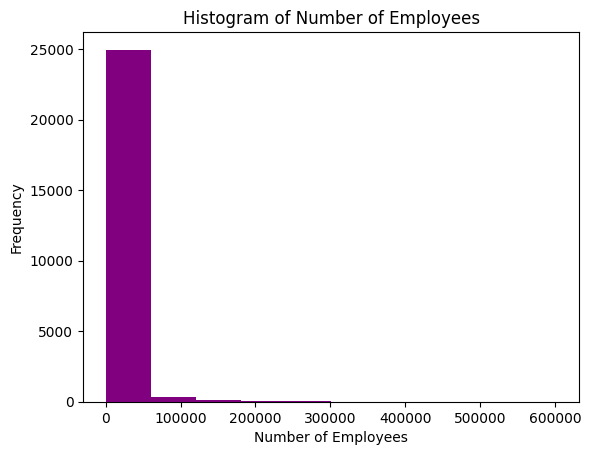

In [34]:
import matplotlib.pyplot as plt

plt.hist(df['no_of_employees'], color = 'purple')
plt.title(f'Histogram of Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')
plt.show()

Right Skewed. The number of employees is not distributed evenly which might affect/influence our analysis.

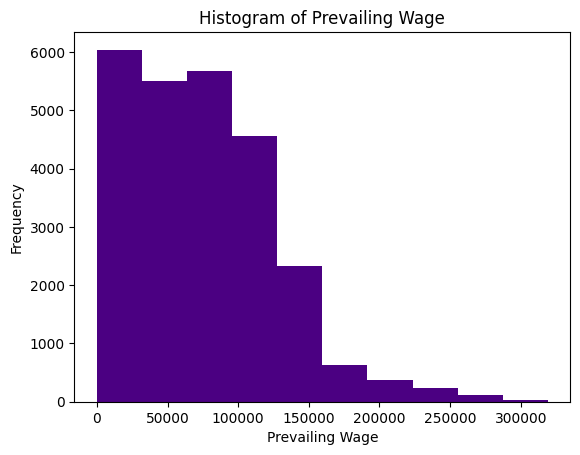

In [51]:
plt.hist(df['prevailing_wage'], color = 'indigo')
plt.title(f'Histogram of Prevailing Wage')
plt.xlabel('Prevailing Wage')
plt.ylabel('Frequency')
plt.show()

This is right-skewed, but resembles some distribution. There might be some outliers on the upper end of the scale. Might be helpful to plot on a boxplot/pairplot.

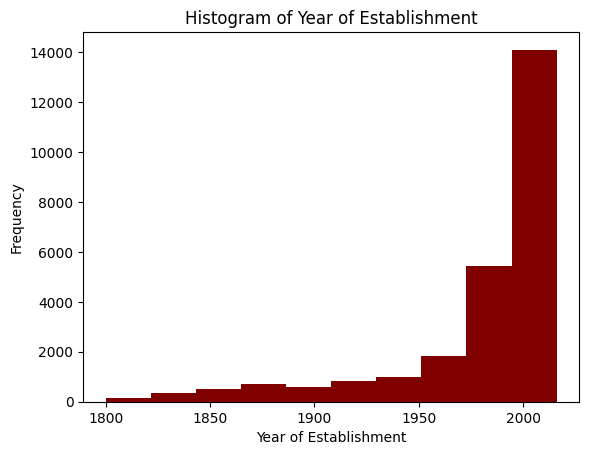

In [53]:
plt.hist(df['yr_of_estab'], color = 'maroon')
plt.title(f'Histogram of Year of Establishment')
plt.xlabel('Year of Establishment')
plt.ylabel('Frequency')
plt.show()

Years of Establishment is left-skewed. This indicates that the dataset has newer establishments as they are increasing over time. Furthermore, looking into the outliers from the earlier establishments might show trends and patterns to look for in newer establishments.

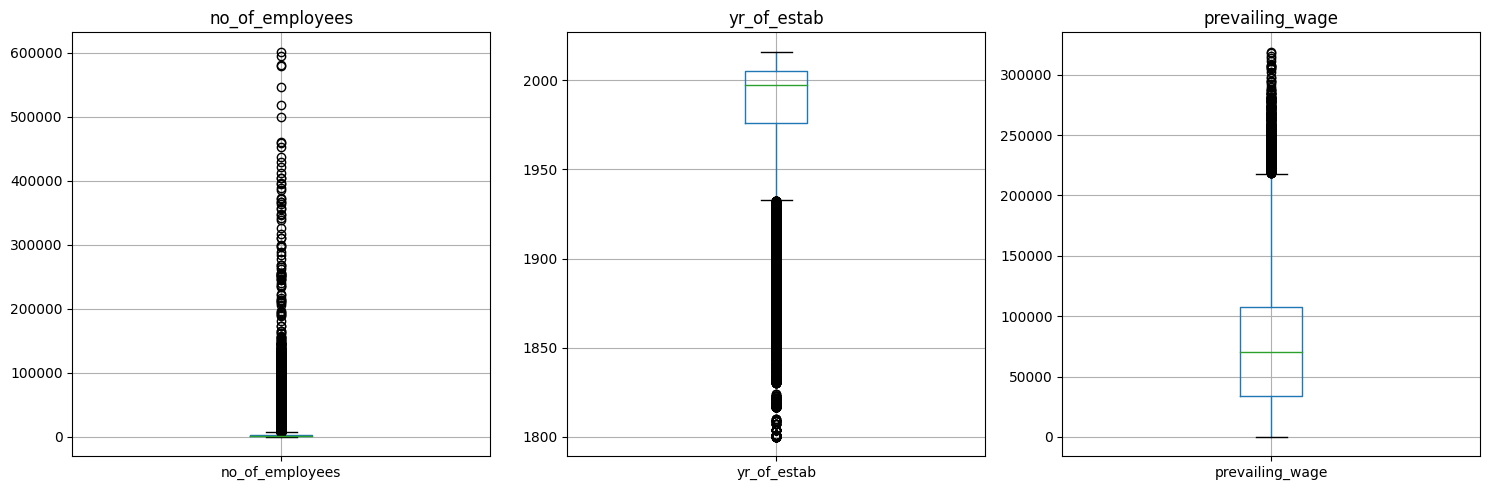

In [55]:
import seaborn as sns

# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 5))

# Plot box plots for each numeric feature
for i, column in enumerate(numeric_columns):
    df.boxplot(column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

Like stated before, number of employees has a small box on the lower end of the range with many outliers within it. This will need to be looked at further, possibly feature engineering will help with an accurate prediction model.

Also, newer establishments are more frequent, but there are many documented establishments that lie outside of the box that could be significant to the interpretation of the data. As well as, we must consider the time frame.

## Bivariate Analysis:

## Multivariate Analysis: